Question 1)

In [1]:
class RowVectorFloat:
    '''This class represents a row vector'''
    def __init__(self, arr):
        self.row = arr
        self.n = len(arr)
    
    def __str__(self):
        return str(self.row)

    def __len__(self):
        return len(self.row)
    
    def __getitem__(self, i):
        return self.row[i]
    
    def __setitem__(self, i, value):
        self.row[i] = value
        return
    
    def __sum__(self):
        return sum(self.row)

    def __add__(self, a):
        if isinstance(a, RowVectorFloat) == False:
            raise TypeError("Unsupported operand type(s) for +: '{}' and '{}'".format(
                type(self).__name__, type(a).__name__))
        if len(a) != self.n:
            raise Exception("Dimensions not matching")
            
        arr = [ele for ele in self.row]
        for i in range(self.n):
            arr[i] += a[i]
        return RowVectorFloat(arr)
    
    def __sub__(self, a):
        if isinstance(a, RowVectorFloat) == False:
            raise TypeError("Unsupported operand type(s) for -: '{}' and '{}'".format(
                type(self).__name__, type(a).__name__))
        if len(a) != self.n:
            raise Exception("Dimensions not matching")
            
        arr = [ele for ele in self.row]
        for i in range(self.n):
            arr[i] -= a[i]
        return RowVectorFloat(arr)
    
    def __mul__(self, y):
        return RowVectorFloat([y*ele for ele in self.row])
    
    def __rmul__(self, y):
        return RowVectorFloat([y*ele for ele in self.row])
    

    def __truediv__(self, y):
        return RowVectorFloat([ele/y for ele in self.row])
    

In [2]:
r = RowVectorFloat([1, 2, 4])
print(r/2)

[0.5, 1.0, 2.0]


In [3]:
r = RowVectorFloat([])
print(len(r))

0


In [4]:
# it is possible to access its ith element
# getitem
r = RowVectorFloat([1, 2 , 4])
r[1]

2

In [5]:
# modify the ith element
# setitem
r = RowVectorFloat([1, 2 , 4])
r[2] = 5
print(r)

[1, 2, 5]


In [6]:
# Note that, r1 + r2 alone should not make any changes in r1 and r2
# Learn about shallow copy and deep copy

r1 = RowVectorFloat([1, 2, 4])
r2 = RowVectorFloat([1, 1, 1])
print(r1 + r2)
print(r1, r2)

[2, 3, 5]
[1, 2, 4] [1, 1, 1]


In [7]:
# The assginment of r1 + r2 to r1 should make a change in r1 see below
r1 = RowVectorFloat([1, 2, 4])
r2 = RowVectorFloat([1, 1, 1])
r1 = r1 + r2
print(r1, r2)

[2, 3, 5] [1, 1, 1]


In [8]:
r1 = RowVectorFloat([1, 2, 4, 7])
r2 = RowVectorFloat([1, 1, 1])
r1 = r1 + r2

Exception: Dimensions not matching

In [9]:
# Operator overloading using __mul__, __rmul__

r1 = RowVectorFloat([1, 2 , 4])
r2 = RowVectorFloat([1, 1 , 1])
r3 = 2*r1 + (-3)*r2
print(r3)


[-1, 1, 5]


Question 2)

In [10]:
import random 
class SquareMatrixFloat():
    def __init__ (self, n = 0):
        self.matrix = [RowVectorFloat([0 for _ in range(n)]) for _ in range(n)]
        self.n = n

    def __str__(self):
        ans = "The matrix is\n"
        for row in self.matrix:
            for i in range(self.n):
                ans += str(row[i]) + " "
            ans += "\n"
        return ans
    
    def sampleSymmetric(self):
        for i in range(self.n):
            self.matrix[i][i] = random.uniform(0, self.n)
            for j in range(i+1, self.n):
                self.matrix[i][j] = self.matrix[j][i] = random.uniform(0, 1)
        return
    
    def toRowEchelonForm(self):
        for i in range(self.n):
            self.matrix[i] = self.matrix[i]/self.matrix[i][i]
            for j in range(i+1, self.n):
                self.matrix[j] = self.matrix[j] - self.matrix[i]*self.matrix[j][i]
        return

    def isDRDominant(self):
        # strictly row dominanat
        for i in range(self.n):
            if 2*self.matrix[i][i] <= sum(self.matrix[i]):
                return False
        return True
    
    def norm2(self, a):
        return (sum([ele*ele for ele in a]))**(0.5)
    
    def norm2_error(self, x, b):
        res = [ sum([self.matrix[i][j]*x[j] for j in range(self.n)]) - b[i] for i in range(self.n) ]
        return self.norm2(res)

    def jSolve(self, b, m):
        # jordan method
        if self.isDRDominant() == False:
            raise Exception("The matrix is not diagnoally row dominant, Not solving because convergence is not guranteed.")
        
        # Initialized with some random vector
        x_prev = [random.uniform(0, 100) for _ in range(self.n)]
        x_next = x_prev.copy()
        errors = [self.norm2_error(x_next, b), ]

        for _ in range(m):
            for i in range(self.n):
                term = 0
                for j in range(self.n):
                    if(i != j):
                        term += x_prev[j]*self.matrix[i][j]
                x_next[i] = (1/self.matrix[i][i]) * (b[i] - term)
            errors.append(self.norm2_error(x_next, b))
            x_prev = x_next.copy()
        return errors, x_next
    
    def gsSolve(self, b, m):
        # Gauss seidel method
        if self.isDRDominant() == False:
            raise Exception("The matrix is not diagnoally row dominant, Not solving because convergence is not guranteed.")
        
        # Initialized with some random vector
        x_prev = [random.uniform(0, 100) for _ in range(self.n)]
        x_next = x_prev.copy()
        errors = [self.norm2_error(x_next, b), ]

        for _ in range(m):
            for i in range(self.n):
                
                # Using computed stuff so far
                term1 = 0
                for j in range(i-1):
                    term1 += x_next[j]*self.matrix[i][j]

                term2 = 0
                for j in range(i+1, self.n):
                    term2 += x_prev[j]*self.matrix[i][j]
            
                x_next[i] = (1/self.matrix[i][i]) * (b[i] - term1 - term2)
            errors.append(self.norm2_error(x_next, b))
            x_prev = x_next.copy()
        return errors, x_next

In [11]:
# The following code creates a 4 X 4 zero square matrix
s = SquareMatrixFloat(4)

In [12]:
# Printing matrix
# __str__
s = SquareMatrixFloat(3)
print(s)

The matrix is
0 0 0 
0 0 0 
0 0 0 



In [13]:
s = SquareMatrixFloat(4)
s.sampleSymmetric()
print(s)

The matrix is
2.188657004694359 0.5608740609804965 0.083100629398419 0.6295630351916541 
0.5608740609804965 1.7862992273267282 0.5033356880291486 0.31079608966060346 
0.083100629398419 0.5033356880291486 0.5891314961698169 0.6055054937696395 
0.6295630351916541 0.31079608966060346 0.6055054937696395 3.783339853661689 



In [14]:
# Row echolon form 
s = SquareMatrixFloat(4)
s.sampleSymmetric()
print(s)
s.toRowEchelonForm()
print(s)

The matrix is
0.7193751332100273 0.14547607780904248 0.9818823898204789 0.8774204995359144 
0.14547607780904248 3.84122342489247 0.2786248660327162 0.4212848762218875 
0.9818823898204789 0.2786248660327162 1.3665100131041328 0.5032742571663481 
0.8774204995359144 0.4212848762218875 0.5032742571663481 1.3586738871915425 

The matrix is
1.0 0.20222561372102582 1.3649101066909002 1.2196981227591925 
0.0 1.0 0.021003988661634276 0.06397179638157335 
0.0 0.0 1.0 -28.378414013875577 
-0.0 -0.0 -0.0 1.0 



In [21]:
# Checking Whether Row dominant (or) not
s = SquareMatrixFloat(4)
s.sampleSymmetric()
print(s.isDRDominant())
print(s)

True
The matrix is
3.0712715877165415 0.8205217773785093 0.8368944324122304 0.03559626921801773 
0.8205217773785093 3.733081599512779 0.08552959619429668 0.22614296920418064 
0.8368944324122304 0.08552959619429668 1.9073149044833655 0.6432385979693753 
0.03559626921801773 0.22614296920418064 0.6432385979693753 2.4144251785819555 



In [22]:
def getDominant(n):
    # This function returns a strictly dominant matrix
    s = SquareMatrixFloat(n)
    while(s.isDRDominant() == False):
        s.sampleSymmetric()
    return s

x =  [-0.24030555692860547, -0.11580088400184214, 0.11240075017814569, 0.21505288794833807, 0.36440203209347055, 0.6400174254659758, 0.6892357769993736, 1.2268054005590467, 1.1106265857807516, 1.1170777530437113]


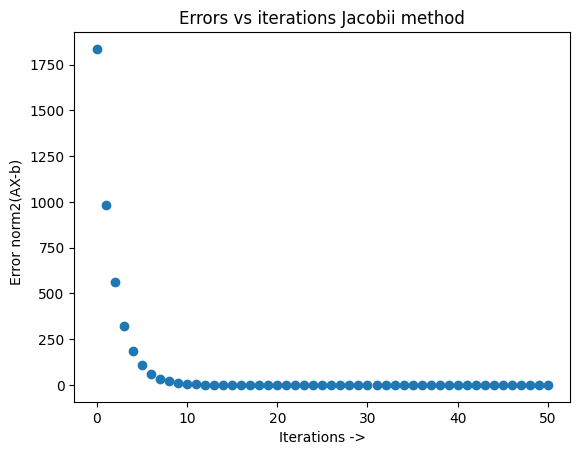

In [25]:
# Running jacobii

import matplotlib.pyplot as plt
    
n = 10                                                              
s = getDominant(n)  
m = 50                                               # Number of iterations
errors, x = s.jSolve([i+1 for i in range(n)], m)
print("x = ", x)
plt.scatter([i for i in range(0, m+1)], errors)
plt.xlabel("Iterations ->")
plt.ylabel("Error norm2(AX-b)  ")
plt.title("Errors vs iterations Jacobii method")
plt.show()

In [ ]:
# For higher n it is taking hell lot of time to get row nominant matrix from the distributuon choosen
n = 20
s = getDominant(n)

KeyboardInterrupt: 

x =  [-0.20930004466759458, -0.1255760665963016, -0.004759828439119754, 0.1365363210984401, 0.4248322608286603, 0.4724816667880326, 1.034505464422251, 0.7131672255966699, 1.1032993708562993, 1.5005174836169577]


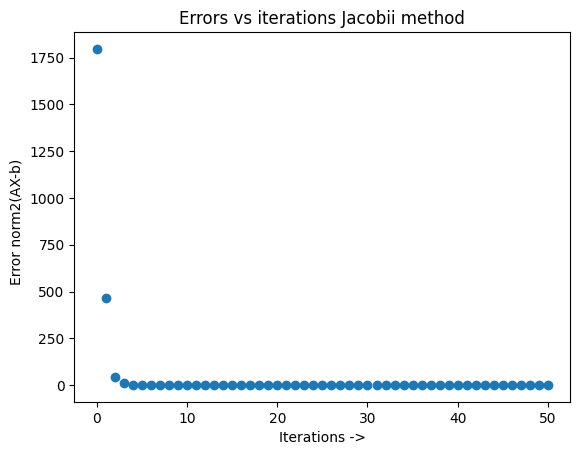

In [26]:
# Gauss-Siedel iterative procedure

import matplotlib.pyplot as plt
    
n = 10
s = getDominant(n)
m = 50
errors, x = s.gsSolve([i+1 for i in range(n)], m)
print("x = ", x)
plt.scatter([i for i in range(0, m+1)], errors)
plt.xlabel("Iterations ->")
plt.ylabel("Error norm2(AX-b)  ")
plt.title("Errors vs iterations Jacobii method")
plt.show()  

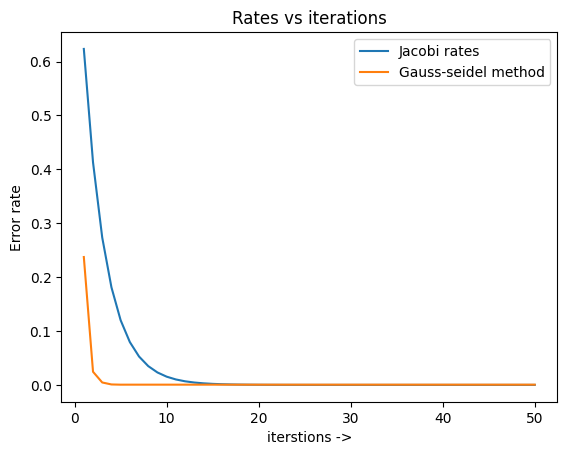

In [27]:
# Should we find x star, and find rate of convergence ??


n = 15
s = getDominant(n)
m = 50

# Jacobi method
errors1, x1 = s.jSolve([i+1 for i in range(n)], m)
rates1 = [ele/errors1[0] for ele in errors1[1:]]
plt.plot([i + 1 for i in range(m)], rates1, label = "Jacobi rates")

# Gauss seidel method
errors2, x2 = s.gsSolve([i+1 for i in range(n)], m)
rates2 = [ele/errors2[0] for ele in errors2[1:]]
plt.plot([i + 1 for i in range(m)], rates2, label = "Gauss-seidel method")

plt.xlabel("iterstions ->")
plt.ylabel("Error rate")
plt.title("Rates vs iterations")
plt.legend()
plt.show()

Question 4)

In [18]:
import copy
import numpy as np
import matplotlib.pyplot as plt

class Polynomial:
    def __init__(self, coeff):
        self.coeff = coeff
        self.n = len(coeff)

    def __len__(self):
        return self.n
    
    def __str__(self):
        ans = "Coefficients of the polynomial are:\n"
        for ele in self.coeff:
            ans += str(ele) + " "
        ans += "\n"
        return ans
    
    def __add__(self, p2):
        if isinstance(p2, Polynomial) == False:
            raise TypeError("Unsupported operand type(s) for +: '{}' and '{}'".format(
                type(self).__name__, type(p2).__name__))
        ans = []
        i, j = 0, 0
        while i < self.n and  j < len(p2):
            ans.append(self.coeff[i] + p2.coeff[j])
            i += 1
            j += 1
        while i < self.n:
            ans.append(self.coeff[i])
            i += 1
        while j < len(p2):
            ans.append(p2.coeff[j])
            j += 1
        return Polynomial(ans)

    def __sub__(self, p2):
        if isinstance(p2, Polynomial) == False:
            raise TypeError("Unsupported operand type(s) for -: '{}' and '{}'".format(
                type(self).__name__, type(p2).__name__))
        ans = []
        i, j = 0, 0
        while i < self.n and j < len(p2):
            ans.append(self.coeff[i] - p2.coeff[j])
            i += 1
            j += 1
        while i < self.n:
            ans.append(self.coeff[i])
            i += 1
        while j < len(p2):
            ans.append(-p2.coeff[j])
            j += 1
        return Polynomial(ans)
    
    def __truediv__(self, num):
        return Polynomial([ele/num for ele in self.coeff])
    
    def __mul__(self, poly):
        if type(poly) == int or type(poly) == float:
            return Polynomial([ele*poly for ele in self.coeff])
        if type(poly) != Polynomial:
            raise TypeError("Unsupported operand type(s) for * : '{}' and '{}'".format(
                type(self).__name__, type(poly).__name__))
        
        n = self.n
        m = len(poly)
        new_degree = n+m-1
        new_coeff = [0 for _ in range(new_degree)]
        
        for i in range(n):
            for j in range(m):
                new_coeff[i+j] += (self.coeff[i] * poly.coeff[j])
                
        return Polynomial(new_coeff)

    def __rmul__(self, poly):
        if type(poly) == int or type(poly) == float:
            return Polynomial([ele*poly for ele in self.coeff])
        if type(poly) != Polynomial:
            raise TypeError("Unsupported operand type(s) for * : '{}' and '{}'".format(
                type(self).__name__, type(poly).__name__))
        
        n = self.n
        m = len(poly)
        new_degree = n+m-1
        new_coeff = [0 for _ in range(new_degree)]
        
        for i in range(n):
            for j in range(m):
                new_coeff[i+j] += (self.coeff[i] * poly.coeff[j])
                
        return Polynomial(new_coeff)

    def __getitem__(self, num):
        if type(num) != int and type(num) != float:
            raise TypeError("Unsupported operand for [] : '{}' and '{}'".format(type(self).__name__, type(num).__name__))
        return sum( [self.coeff[i]* (num**i) for i in range(self.n)])
    
    def fitViaMatrixMethod(self, points):
        a = []
        b = []
        n = len(points)
        for x, y in points:
            a.append([x**i for i in range(n)])
            b.append(y)
        a = np.array(a)
        n = np.array(b)
        self.coeff = list(np.linalg.solve(a, b))
        self.n = len(self.coeff)

        x_points = [x for x, y in points]
        y_points = [y for x, y in points]
        plt.scatter(x_points, y_points, color = 'red')
        self.show(min(x_points), max(x_points))
        return

    
    def phi_j(self, j, points, n):
        # n is number of points
        numerator = Polynomial([1]) # initialized like this for ease
        denominator = 1
        xj, yj = points[j]
        for i in range(n):
            xi, yi = points[i]
            if i != j:
                numerator  = numerator*Polynomial([-xi, 1])
                denominator *= (xj - xi)
        return numerator/denominator
        
    def fitViaLagrangePoly(self, points):
        n = len(points)
        ans = Polynomial([]) 
        for j in range(n):
            xj, yj = points[j]
            ans = ans + yj * self.phi_j(j, points, n)
        
        self.coeff = ans.coeff
        self.n = len(ans.coeff)
        x_points = [x for x, y in points]
        y_points = [y for x, y in points]
        plt.scatter(x_points, y_points, color = 'red')
        self.show(min(x_points), max(x_points))
        return
    
    def show(self, a, b):
        step = 0.25/2

        plt.plot([a + step*i for i in range(int((b-a)/step) + 1)], [ self[a + step*i]  for i in range(int((b-a)/step) + 1)])
        plt.xlabel("x ->")
        plt.ylabel("value (y)")
        plt.title("Plotting polynomial from " +  str(a) + " to " + str(b))
        plt.grid()
        plt.show()
    

In [19]:
#  The following code creates the polynomial 1 + 2x + 3x^2
p = Polynomial([1, 2, 3])

In [70]:
p = Polynomial([1, 2, 3])
print(p)

Coefficients of the polynomial are:
1 2 3 



In [55]:
p1 = Polynomial([1, -10, 3])
p2 = Polynomial([3, 2, 1])
p3 = p1 + p2
print(p3)

Coefficients of the polynomial are:
4 -8 4 



In [56]:
p1 = Polynomial([1, 2, 3])
p2 = Polynomial([3, 2, 1])
p3 = p1 - p2
print(p3)

Coefficients of the polynomial are:
-2 0 2 



In [57]:
# It is possible to pre-multiply the polynomial by a real number using the * operator.
# What is meant by pre-multiply ??

p1 = Polynomial([1, 2, 3])
p2 = (-0.5)*p1
print(p2)
p3 = p1*(-0.4)
print(p3)

Coefficients of the polynomial are:
-0.5 -1.0 -1.5 

Coefficients of the polynomial are:
-0.4 -0.8 -1.2000000000000002 



In [58]:
# It is possible to multiple two polynomials using the * operator.
p1 = Polynomial([-1, 1])
p2 = Polynomial([1, 1, 1])
p3 = p1 * p2
print(p3)

Coefficients of the polynomial are:
-1 0 0 1 



In [59]:
p1 = Polynomial([-1, -2, 5])
p2 = Polynomial([-3, 4])
p3 = p1 * p2
print(p3)

Coefficients of the polynomial are:
3 2 -23 20 



In [60]:
# It is possible to evaluate the polynomial at any real number using the [ ] operator.
p = Polynomial([1, 2, 3])
print(p[2])

17


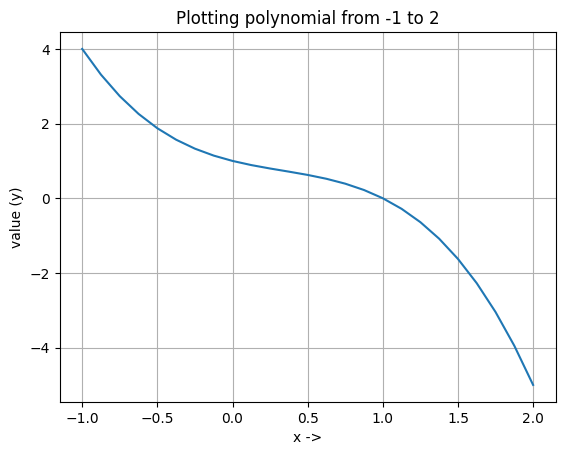

In [61]:
# It is possible to visualize the polynomial in any interval of the type [a, b]
p = Polynomial([1, -1, 1, -1])
p.show(-1, 2)

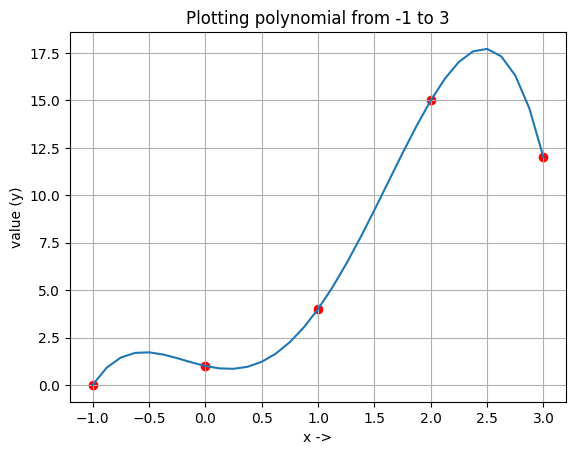

In [20]:
p = Polynomial([])
p.fitViaMatrixMethod([(1,4), (0,1), (-1, 0), (2, 15), (3,12)])

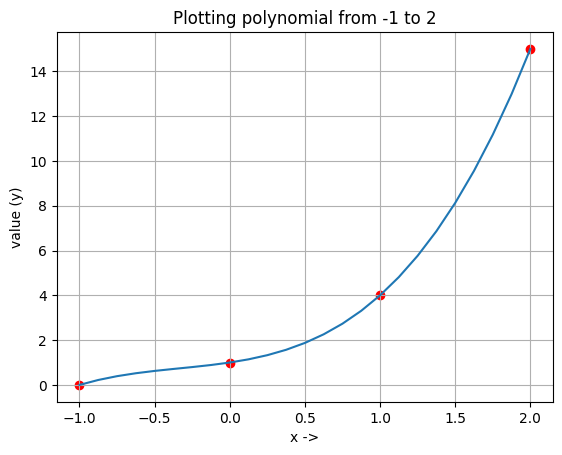

In [22]:
p = Polynomial([])
p.fitViaMatrixMethod([(0, 1), (1, 4), (-1, 0), (2, 15)])

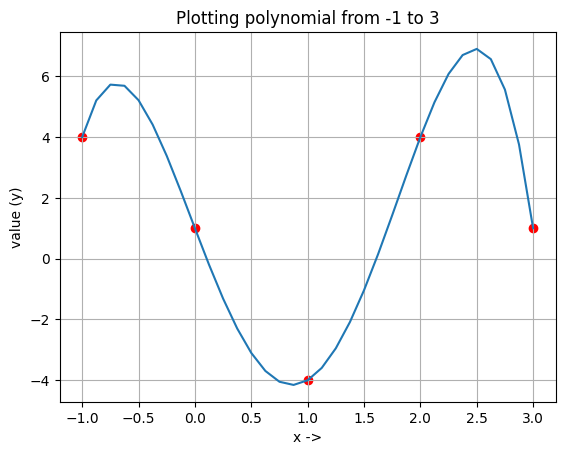

In [150]:
# It should have a method fitViaLagrangePoly that computes the Lagrange polynomial for the points passed as argument to this method.
p = Polynomial([])
p.fitViaLagrangePoly([(1,-4), (0,1), (-1, 4), (2, 4), (3,1)])


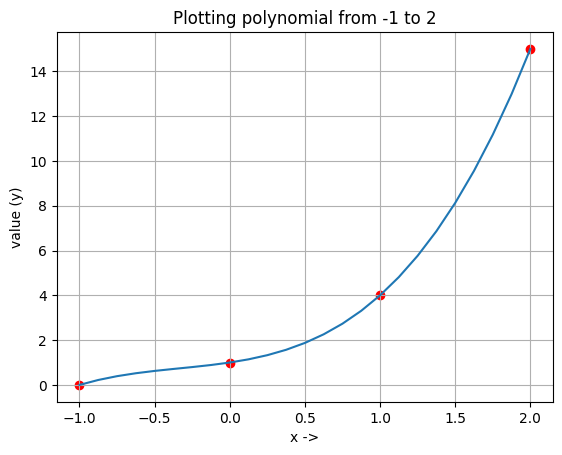

In [24]:
p = Polynomial([])
p.fitViaLagrangePoly([(0, 1), (1, 4), (-1, 0), (2, 15)])

Question 5 <br/>
Using the FuncAnimation function of matplotlib, create an animation to demonstrate the
various interpolations available in Python’s scipy.interpolate module. Your animation
should also demonstrate how sampling more points of a function will create better interpolations.
A reference animation is available at animation link. Try to match the reference animation as
much as possible.

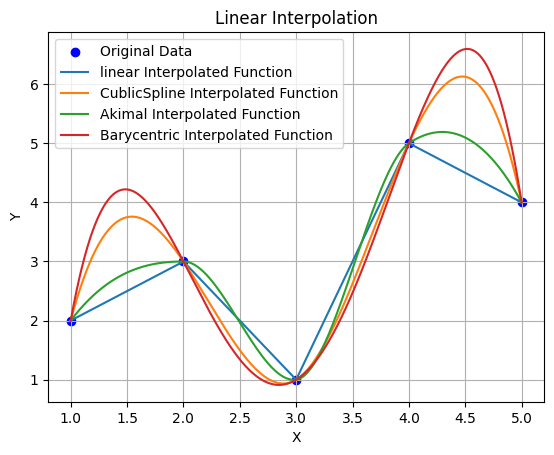

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
from scipy.interpolate import Akima1DInterpolator
from scipy.interpolate import BarycentricInterpolator



# Sample data points
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 1, 5, 4])

# Perform linear interpolation
f1 = interp1d(x, y, kind='linear')
f2 = CubicSpline(x, y)
f3 = Akima1DInterpolator(x, y)
f4 = BarycentricInterpolator(x, y)

# Generate x values for plotting
x_plot = np.linspace(min(x), max(x), 1000000)

# Plot original data points
plt.scatter(x, y, color='blue', label='Original Data')

# Plot interpolated function
plt.plot(x_plot, f1(x_plot), label='linear Interpolated Function')
plt.plot(x_plot, f2(x_plot), label='CublicSpline Interpolated Function')
plt.plot(x_plot, f3(x_plot), label='Akimal Interpolated Function')
plt.plot(x_plot, f4(x_plot), label='Barycentric Interpolated Function')


# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Interpolation')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


/home/sandeep/.local/lib/python3.10/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


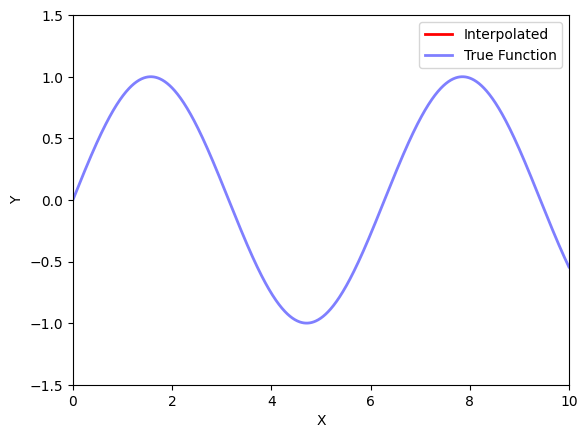

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.interpolate import interp1d

# Define the function to interpolate
def true_function(x):
    return np.sin(x)

# Generate sample data
x_true = np.linspace(0, 10, 1000)
y_true = true_function(x_true)

# Generate initial empty plot
fig, ax = plt.subplots()
line, = ax.plot([], [], 'r', lw=2)  # Line to represent interpolated data
true_line, = ax.plot(x_true, y_true, 'b', lw=2, alpha=0.5)  # Line to represent true function

# Set up the axes properties
ax.set_xlim(0, 10)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend(['Interpolated', 'True Function'])

# Generate animation frames
def update(frame):
    ax.clear()
    ax.plot(x_true, y_true, 'b', lw=2, alpha=0.5)
    num_points = 10 * (frame + 1)
    x_sample = np.linspace(0, 10, num_points)
    y_sample = true_function(x_sample)
    interpolations = ['linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic']  # Add more as needed
    for interp in interpolations:
        f = interp1d(x_sample, y_sample, kind=interp)
        ax.plot(x_true, f(x_true), label=interp)
    ax.legend()

# Create the animation
ani = FuncAnimation(fig, update, frames=30, repeat=False)

# Show the animation
plt.show()
